
# Unpacking Inertia Calculation 
from  https://github.com/citrusvanilla/multiplewavetracking_py?tab=readme-ov-file

# Original Code
This is the code used to calculate inertia in the paper I'm trying to reproduce.

```python

denominator = math.sqrt(
    (2 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
)
epsilon = 0.01
ratio = 0.0

if denominator > epsilon:
    cosmin = (moments["m20"] - moments["m02"]) / denominator
    sinmin = 2 * moments["m11"] / denominator
    cosmax = -cosmin
    sinmax = -sinmin

    imin = (
        0.5 * (moments["m20"] + moments["m02"])
        - 0.5 * (moments["m20"] - moments["m02"]) * cosmin
        - moments["m11"] * sinmin
    )
    imax = (
        0.5 * (moments["m20"] + moments["m02"])
        - 0.5 * (moments["m20"] - moments["m02"]) * cosmax
        - moments["m11"] * sinmax
    )
    ratio = imin / imax
```

# Denominator formula

```python

 denominator = math.sqrt(
    (2 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
)
```

The `moments` are calculated by opencv. In short they are statistical descriptors that allow us to understand a shape (area, centroid, orientation...)

In order to understand this formula, let's load a simple image, calculate its moments and try to figure out the inertia  

## Load libraries and image

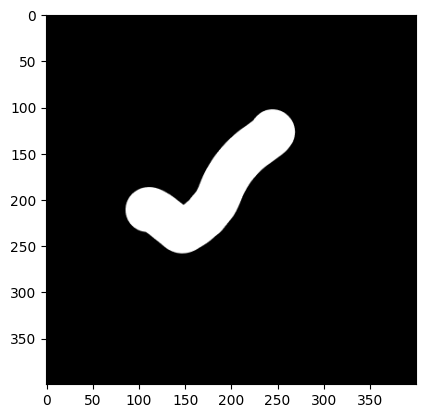

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt 
img = cv.imread('media/t1.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')


## Find contours of the image 

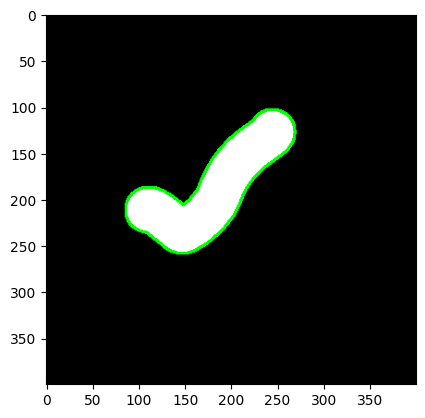

In [3]:
# Find contours
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Create a color copy of the image in order to draw the contours
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
# Draw the contours
cv.drawContours(img_color, contours, -1, (0, 255, 0), 2)
plt.imshow(img_color)


The single image contour appears in green surrounding our white blob

## Find Image Moments from contours

We're going to use opencv `cv.moments`, which gives us a list of image moments

In [4]:
moments = cv.moments(contours[0])


## A brief explanation of the moments


There is a long list of moments, but for our denominator formula, only 3 are used: `m11`, `m20`, and `m02`

Here's a short definition of each of the moments

- `m20` is the second order spatial moment with respect to x, calculated by the sum of the squares of the x coordinates of the contour
- `m02` is the second order spatial moment with respect to y, calculated by the sum of the squares of the y coordinates of the contour
- `m11` is the sum of the products of the x and y coordinates of the contour
    

## Back to the formula
```python
import math
denominator = math.sqrt(
    (2 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
)
```

In [5]:
import math
denominator = math.sqrt(
    (2 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
)
denominator


715016265.1777502

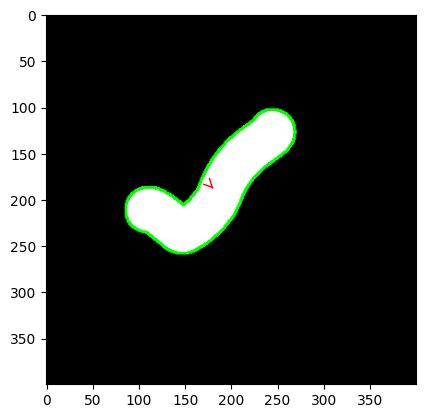

In [7]:
#The result of the formula is the orientation of the object in radians. To convert it to degrees, you can use the math.degrees() function:

angle = 0.5 * math.atan2(2 * moments["m11"], moments["m20"] - moments["m02"])
angle

# plot a vector with the angle

import numpy as np
from matplotlib.patches import FancyArrowPatch

fig, ax = plt.subplots()
ax.imshow(img_color)
arrow = FancyArrowPatch(
    (moments["m10"] / moments["m00"], moments["m01"] / moments["m00"]),
    (moments["m10"] / moments["m00"] + np.cos(angle), moments["m01"] / moments["m00"] + np.sin(angle)),
    color="red",
    arrowstyle="---->",
    mutation_scale=15,
)
ax.add_patch(arrow)
plt.show()

### TODO Aside. Why squares? 

The sum of squares is a standard way in statistics to measure the spread of values, as it prevents positive and negative values from canceling each other out and emphasizes larger deviations.

array([-1.30552514, -0.89005038,  0.58589365, -0.26816366, -0.81527819,
       -1.52985346, -2.24517166, -0.62068804, -0.5935867 ,  0.00502639])

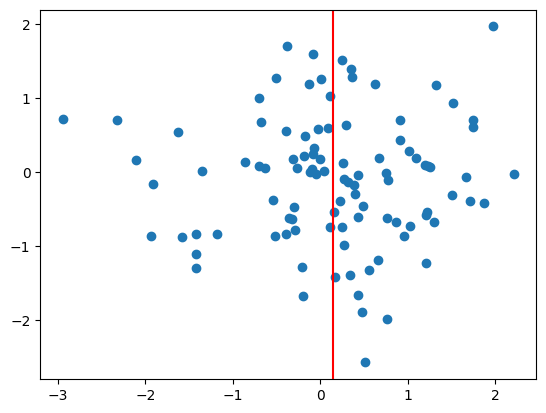

In [39]:
import numpy as np
x = np.random.randn(100)
y = np.random.randn(100)

data = np.array([x, y])
sum_x = np.sum(x)
mean_x = np.mean(x)

plt.axvline(mean_x, color='r')
plt.scatter(x, y)
np.random.randn(10)